## Suppose you are appointed as a Data scientist in any Pharma Company. That company makes medicine for heart disease. Your senior manager has given several clinical parameters about a patient, can you predict whether or not the patient has heart disease? There are following thirteens clinical parameters of the patient.'''

## Discription of the data attribute

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
4. trtbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    -serum = LDL + HDL + .2 * triglycerides  
    -above 200 is cause for concern
6. fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
    -&#39;&gt;126&#39; mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
        1. can range from mild symptoms to severe problems
        2. signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
        1. Enlarged heart&#39;s main pumping chamber
8. thalachh - maximum heart rate achieved
9. exng - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slp - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
12. caa - number of major vessels (0-3) 
    -colored by flourosopycolored vessel means the doctor can see the blood passing through 
    -the more blood movement the better (no clots)
13. thall - thalium stress result
    -1,3: normal
    -6: fixed defect: used to be defect but ok now
    -7: reversable defect: no proper blood movement when excercising
14. output - have disease or not (1=yes, 0=no) (= the predicted attribute)
    When you working on the health of patients then accuracy is deciding factor, Apply different machine learning algorithms and check the accuracy about predicting whether or not the patient has heart disease.

## Objective:                                                                                                                                   

1.We want to see the distribution male and females with heart disease                                  
2.We want to see the distribution of people with heart disease with respect to their age     
3.Use different machine learning model to predict the if a patient has heart disease or not   
Like: Five different machine learning models Logistic Regression, K-Nearest Neighbours Classifier, 
      Support Vector machine, Decision Tree Classifier, Random Forest Classifier on the given dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\chait\Downloads\heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### EDA (Exploratory Data Analysis)

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:>

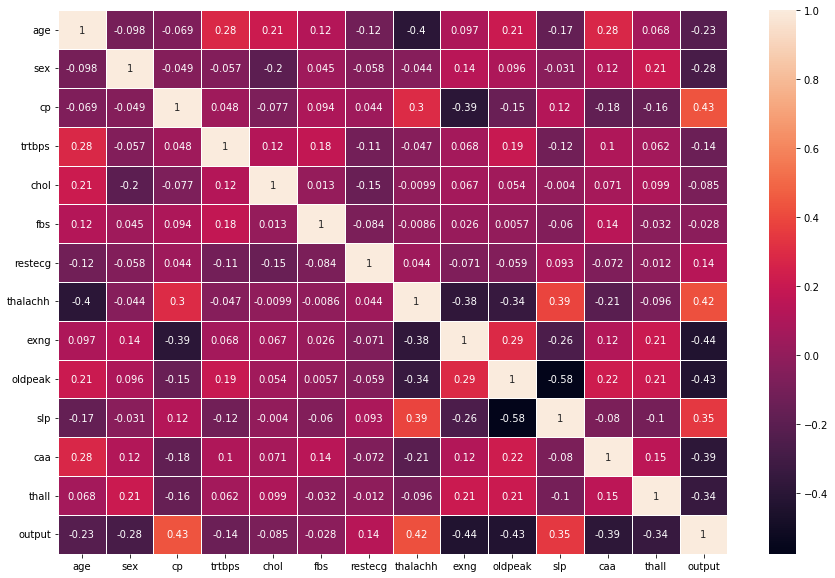

In [4]:

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

1    165
0    138
Name: output, dtype: int64


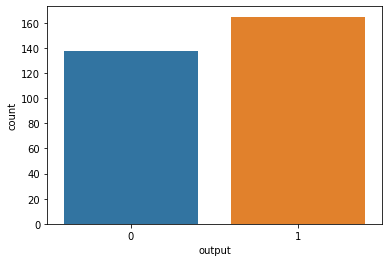

In [5]:
x = sns.countplot(df["output"])
target_var = df.output.value_counts()
print(target_var)

### Percentage of patients with or without heart problems in the given dataset

In [6]:
print("Percentage of patience without heart problems: "+str(round(target_var[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_var[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


<AxesSubplot:xlabel='sex', ylabel='output'>

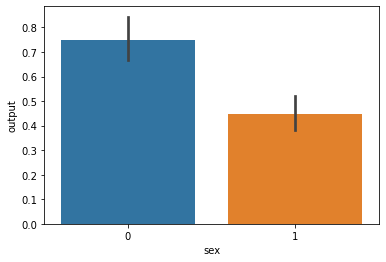

In [7]:
## sex - (1 = male; 0 = female)

sns.barplot(df["sex"],df["output"])

### Percentage of Male and Female Patients

In [8]:
count_Female = len(df[df.sex == 0])
count_Male = len(df[df.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((count_Female)/(len(df.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((count_Male)/(len(df.sex))*100))


Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


### Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

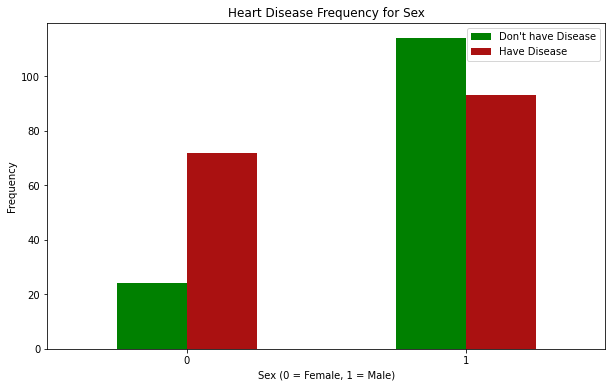

In [9]:
pd.crosstab(df.sex,df.output).plot(kind="bar",figsize=(10,6),color=['green','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [10]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
              'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels',
              'thalassemia', 'output']

In [11]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###  Heart disease according to Fasting Blood sugar

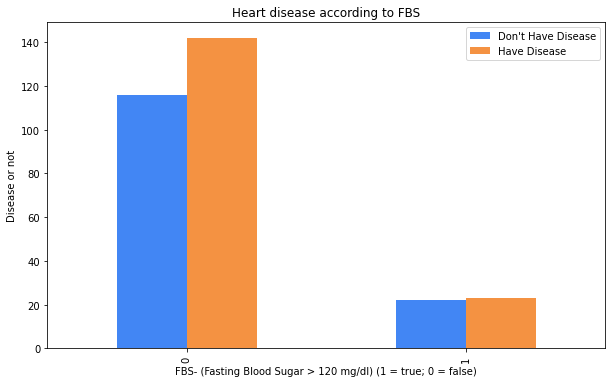

In [12]:
pd.crosstab(df.fasting_blood_sugar,df.output).plot(kind="bar",figsize=(10,6),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

## Analysing the chest pain (4 types of chest pain)[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [13]:
y=df['output']

In [14]:
df["chest_pain_type"].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='chest_pain_type', ylabel='output'>

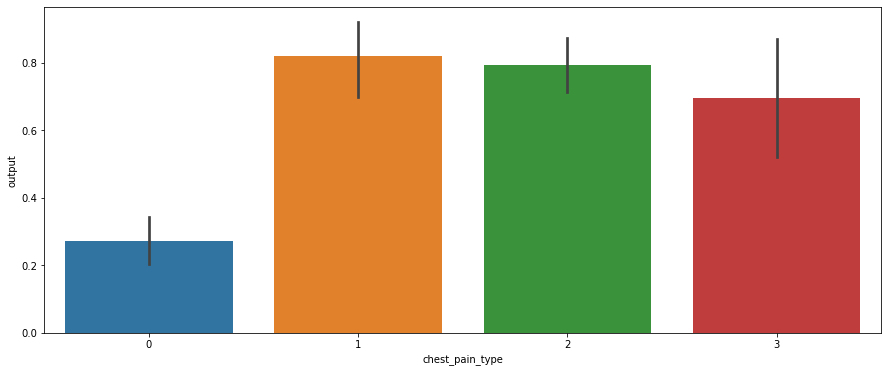

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(df["chest_pain_type"],y)

### Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [16]:
df["rest_ecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='rest_ecg', ylabel='output'>

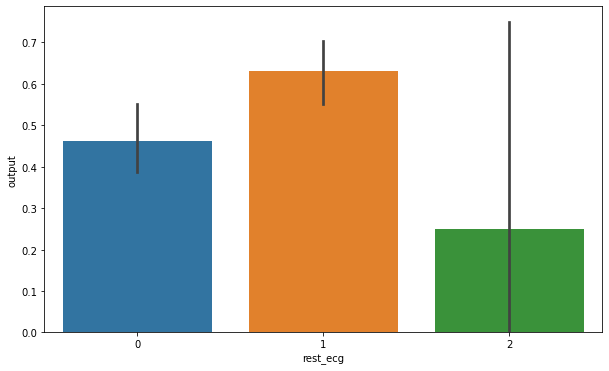

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(df["rest_ecg"],y)

### people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

#### Analysing Exercise induced angina (1 = yes; 0 = no)


In [18]:
df["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exercise_induced_angina', ylabel='output'>

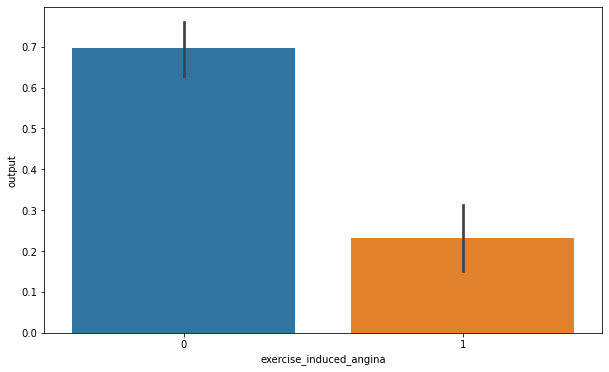

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(df["exercise_induced_angina"],y)

### Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [20]:
df["st_slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='st_slope', ylabel='output'>

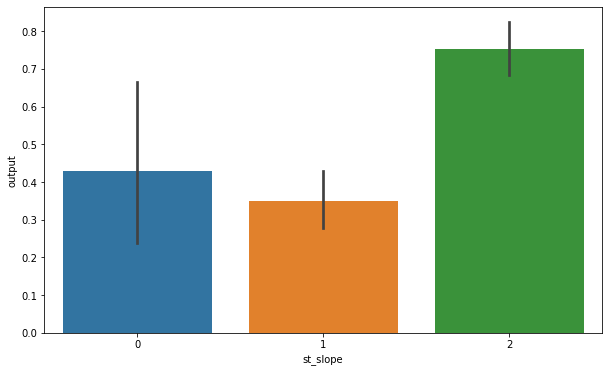

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(df["st_slope"],y)

### Analysing number of major vessels (0-3) colored by flourosopy

In [22]:
df["num_major_vessels"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

### count num_major vessels

<AxesSubplot:xlabel='num_major_vessels', ylabel='count'>

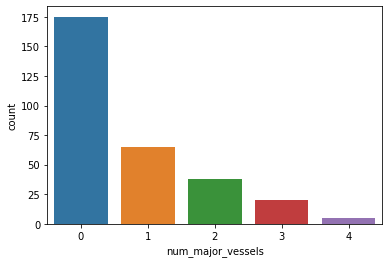

In [23]:
sns.countplot(df["num_major_vessels"])

### comparing with target

<AxesSubplot:xlabel='num_major_vessels', ylabel='output'>

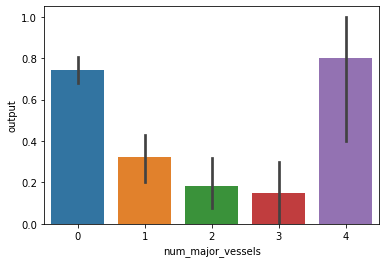

In [24]:
sns.barplot(df["num_major_vessels"],y)

###  num_major_vessels=4 has astonishingly large number of heart patients

## Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

In [25]:
df["thalassemia"].unique()

array([1, 2, 3, 0], dtype=int64)

#### plotting the thalassemia distribution (0,1,2,3)

<AxesSubplot:xlabel='thalassemia', ylabel='Density'>

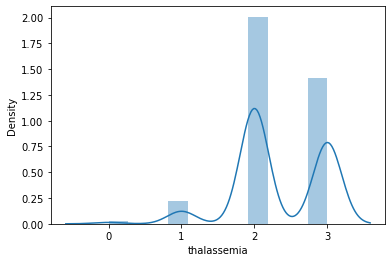

In [26]:
sns.distplot(df["thalassemia"])

### comparing with target

<AxesSubplot:xlabel='thalassemia', ylabel='output'>

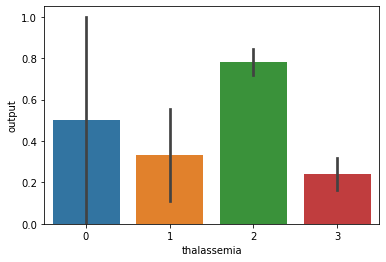

In [27]:
sns.barplot(df["thalassemia"],y)

## Correlation plot

### Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [28]:
# store numeric variables in names
names=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']


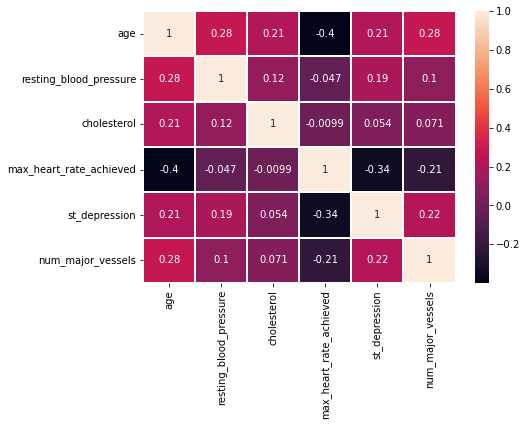

In [29]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = df.loc[:,names]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True,linewidths=.1)
plt.show()

# Splitting the dataset to Train and Test

In [30]:
from sklearn.model_selection import train_test_split

predictors = df.drop("output",axis=1)
target = df["output"]

x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(x_train.shape[0], x_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [31]:
x_train.shape

(242, 13)

In [32]:
x_test.shape

(61, 13)

In [33]:
y_train.shape

(242,)

In [34]:
y_test.shape

(61,)

# Importing the models

In [35]:
from sklearn.metrics import accuracy_score
def train_model(x_train, y_train, x_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(x_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(x_train, y_train)
    test_accuracy = model.score(x_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

## 1.LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred_lr = logreg.predict(x_test)
print(y_pred_lr)


[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [37]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")


The accuracy score achieved using Logistic Regression is: 85.25 %


In [38]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(x_train, y_train, x_test, y_test, LogisticRegression)

Train accuracy: 84.30%
Test accuracy: 85.25%


### Confusion Matrix

<AxesSubplot:>

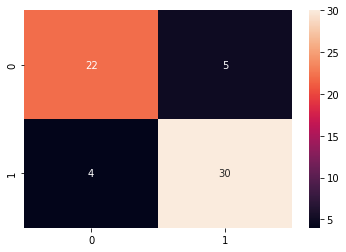

In [39]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix,annot = True, fmt = "d")

In [40]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
print("Precision: ",precision)
print("Recall is: ",recall)
print("F-Score: ",(2*precision*recall)/(precision+recall))

Precision:  0.8571428571428571
Recall is:  0.8823529411764706
F-Score:  0.8695652173913043


In [41]:
CM =pd.crosstab(y_test, y_pred_lr)
CM

col_0,0,1
output,,
0,22,5
1,4,30


In [42]:
## TP = True positive (has heart disease). TN = True negative (has no heart disease). 
## FP = False positive (has no heart disease) FN = False negative (has heart disease)

TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# 2.KNN(K Nearest Neighbors)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(x_train, y_train, x_test, y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
print(y_pred_knn)

Train accuracy: 71.90%
Test accuracy: 68.85%
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [44]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [45]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(x_train, y_train, x_test, y_test, KNeighborsClassifier)

Train accuracy: 78.10%
Test accuracy: 63.93%


In [46]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(x_train, y_train, x_test, y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 52.46%
n_neigbors = 2
Train accuracy: 79.75%
Test accuracy: 59.02%
n_neigbors = 3
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 4
Train accuracy: 76.03%
Test accuracy: 63.93%
n_neigbors = 5
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 6
Train accuracy: 74.38%
Test accuracy: 65.57%
n_neigbors = 7
Train accuracy: 72.31%
Test accuracy: 67.21%
n_neigbors = 8
Train accuracy: 71.90%
Test accuracy: 68.85%
n_neigbors = 9
Train accuracy: 73.14%
Test accuracy: 67.21%


## Confusion matrix

<AxesSubplot:>

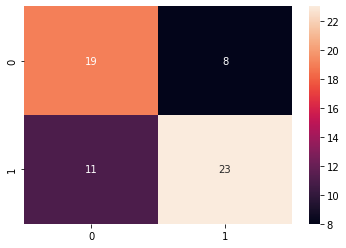

In [47]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix,annot = True, fmt = "d")

In [48]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
print("Precision: ",precision)
print("Recall is: ",recall)
print("F-Score: ",(2*precision*recall)/(precision+recall))

Precision:  0.7419354838709677
Recall is:  0.6764705882352942
F-Score:  0.7076923076923077


In [49]:
CM = pd.crosstab(y_test, y_pred_knn)
CM

col_0,0,1
output,,
0,19,8
1,11,23


In [50]:
## TP = True positive (has heart disease). TN = True negative (has no heart disease). 
## FP = False positive (has no heart disease) FN = False negative (has heart disease)

TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

32.35294117647059

# 3.Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
print(y_pred_dt)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]


In [54]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [55]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


#### The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

#### We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.



In [56]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(x_test, y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.820


### Confusion Matrix

<AxesSubplot:>

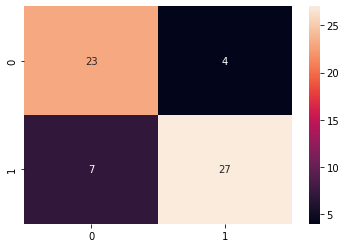

In [59]:
from sklearn.metrics import confusion_matrix

matrix= confusion_matrix(y_test, y_pred_dt)
sns.heatmap(matrix,annot = True, fmt = "d")

In [61]:
# Precision score, recall score, f-score

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)

print("Precision: ",precision)
print("Recall is: ",recall)
print("F-score: ",(2*precision*recall)/(precision+recall))

Precision:  0.8709677419354839
Recall is:  0.7941176470588235
F-score:  0.8307692307692308


In [110]:
CM = pd.crosstab(y_test, y_pred_dt)
CM

col_0,0,1
output,,
0,23,4
1,7,27


In [111]:
## TP = True positive (has heart disease). TN = True negative (has no heart disease). 
## FP = False positive (has no heart disease) FN = False negative (has heart disease)

TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

20.58823529411765

# 4.Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(x_train, y_train)
y_pred_rf = randfor.predict(x_test)
print(y_pred_rf)

[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [65]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 88.52 %


In [67]:
#Random forest with 100 trees

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.885


In [68]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(x_test, y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.869


### Confusion Matrix

<AxesSubplot:>

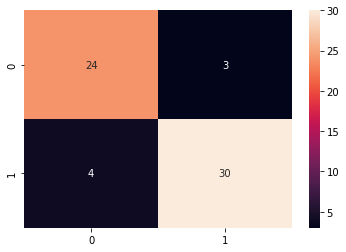

In [84]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")

In [85]:
# Precision score, recall score, f-score

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_rf)
print("Precision: ",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_rf)
print("Recall is: ",recall)

print("F-score: ",(2*precision*recall)/(precision+recall))

Precision:  0.9090909090909091
Recall is:  0.8823529411764706
F-score:  0.8955223880597014


In [86]:
CM =pd.crosstab(y_test, y_pred_rf)
CM

col_0,0,1
output,,
0,24,3
1,4,30


In [87]:
## TP = True positive (has heart disease). TN = True negative (has no heart disease)
## FP = False positive (has no heart disease) FN = False negative (has heart disease)

TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

# False negative rate of the model

fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# 5.Support Vector machine

In [89]:
from sklearn.svm import SVC

s_v_m = SVC()
s_v_m.fit(x_train, y_train)

y_pred_svm = s_v_m.predict(x_test)
print(y_pred_svm)

[0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0]


In [92]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Support Vector machine is: "+str(score_svm)+" %")


The accuracy score achieved using Support Vector machine is: 68.85 %


### Confusion Matrix

<AxesSubplot:>

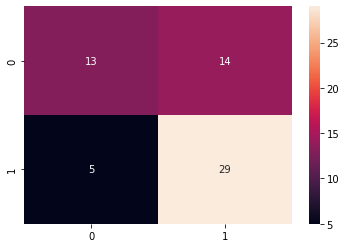

In [94]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred_svm)
sns.heatmap(matrix,annot = True, fmt = "d")

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_svm)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred_svm)*100))

Confusion Matrix: 
[[13 14]
 [ 5 29]]
Accuracy of the Model: 68.85245901639344%


In [96]:
CM =pd.crosstab(y_test, y_pred_svm)
CM

col_0,0,1
output,,
0,13,14
1,5,29


In [97]:
## TP = True positive (has heart disease). TN = True negative (has no heart disease) 
## FP = False positive (has no heart disease) FN = False negative (has heart disease)

TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

# False negative rate of the model

fnr=FN*100/(FN+TP)
fnr

14.705882352941176

In [95]:
# Precision score, recall score, f-score

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_svm)
print("Precision: ",precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_svm)
print("Recall is: ",recall)

print("F-score: ",(2*precision*recall)/(precision+recall))

Precision:  0.6744186046511628
Recall is:  0.8529411764705882
F-score:  0.7532467532467532


# Comparision of all 5 different Machine Learning Models

In [101]:
accuracy = []

# list of algorithms names
classifiers = ['Logistic Regression','KNN', 'Decision Trees','Random Forests','Support Vector machine']

# list of algorithms with parameters
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), 
        RandomForestClassifier(n_estimators=100, random_state=0),SVC()]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    accuracy.append(score)

In [103]:
# create a dataframe from accuracy results

summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
Logistic Regression,0.852459
KNN,0.688525
Decision Trees,0.819672
Random Forests,0.885246
Support Vector machine,0.688525


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

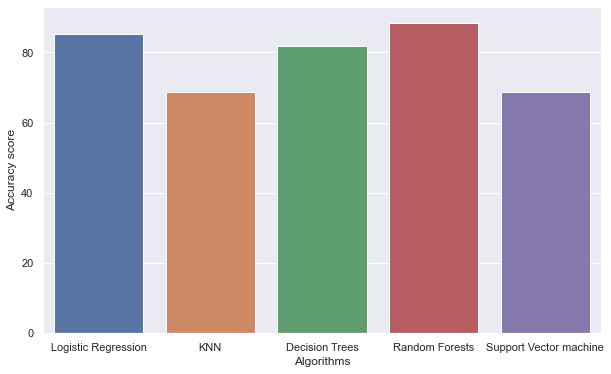

In [108]:
scores = [score_lr,score_knn,score_dt,score_rf,score_svm]

algorithms = ['Logistic Regression','KNN', 'Decision Trees','Random Forests','Support Vector machine'] 
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## F1 score(F Score)

## 1.Logistic Regression     : 0.869
## 2. KNN                               : 0.707
## 3.Decision Tree                : 0.830
## 4.Random Forest             : 0.895
## 5.Support Vector Machine  : 0.753

# So Random Forest algorithm is the best model here and Logistic Regression is the 2nd Best model And here KNN is the worst algorithm

In this project, fourteen attributes are considered which form the primary basis for tests and give accurate results more or less. Many more input attributes can be taken but our goal is to predict with less number of attributes and faster efficiency to predict the risk of having heart disease at a particular age span. Five data mining classification techniques were applied namely Logistic Regression , KNN , Decision Trees , Random Forests , Support Vector machine. It is shown that Random Forest has
better accuracy than the other techniques.


Random Forest is the most effective model to predict patients with heart disease. This projectcould answer complex queries, each with its own strength with respect to ease of modelinterpretation, access to detailed information and accuracy.